In [33]:
#Code below shows that adjusted close prices are not used in this example, as they are not available for all stocks in the dataset.

import yfinance as yf

tickers = ['AAPL', 'GOOGL']
start_date = "2007-01-01"
end_date = "2024-12-31"

# Download data
data = yf.download(tickers, start=start_date, end=end_date)

# Print all column levels (for multi-index structure)
print("\nColumn structure:")
print(data.columns)

# Check if 'Adj Close' is present
has_adj_close = 'Adj Close' in data.columns.get_level_values(0)

print("\nDoes 'Adj Close' exist?", has_adj_close)

# If present, show head
if has_adj_close:
    print("\nSample 'Adj Close' data:")
    print(data['Adj Close'].head())
else:
    print("\nNo 'Adj Close' data found in downloaded DataFrame.")

C:\Users\joabi\AppData\Local\Temp\ipykernel_41236\3813235727.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  2 of 2 completed


Column structure:
MultiIndex([( 'Close',  'AAPL'),
            ( 'Close', 'GOOGL'),
            (  'High',  'AAPL'),
            (  'High', 'GOOGL'),
            (   'Low',  'AAPL'),
            (   'Low', 'GOOGL'),
            (  'Open',  'AAPL'),
            (  'Open', 'GOOGL'),
            ('Volume',  'AAPL'),
            ('Volume', 'GOOGL')],
           names=['Price', 'Ticker'])

Does 'Adj Close' exist? False

No 'Adj Close' data found in downloaded DataFrame.


C:\Users\joabi\AppData\Local\Temp\ipykernel_41236\946675360.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close'] #Closing prices uses instead of adjusted close prices, discussed above.
[*********************100%***********************]  2 of 2 completed


Ticker          AAPL      GOOGL
Date                           
2007-01-03  2.518541  11.631692
2007-01-04  2.574442  12.021498
2007-01-05  2.556108  12.119260
2007-01-08  2.568731  12.029457
2007-01-09  2.782115  12.077218


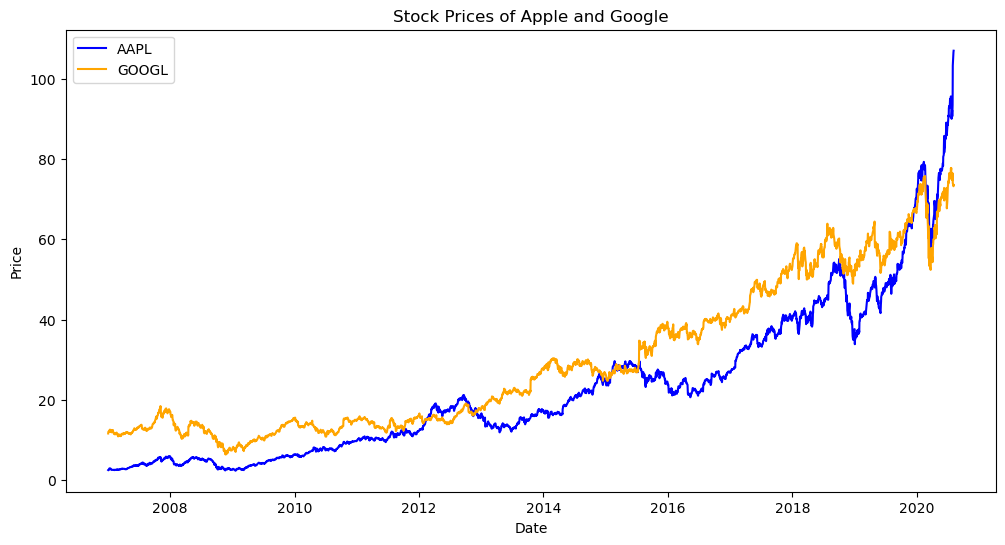

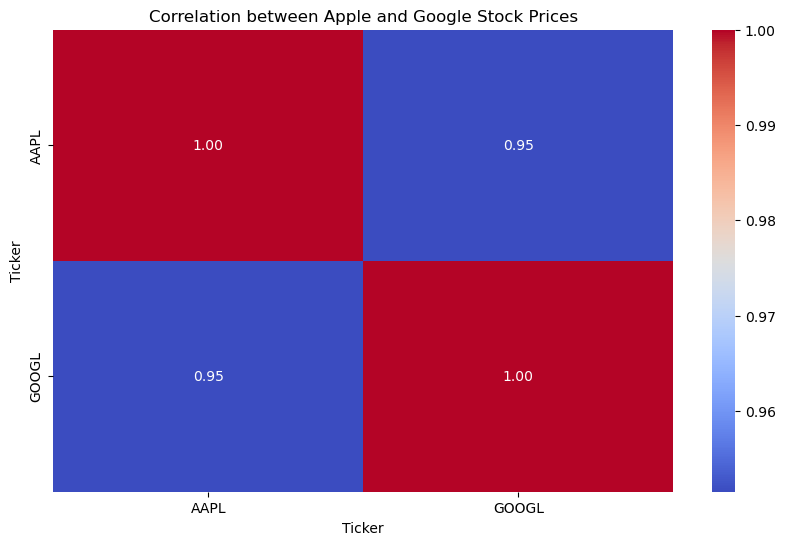

Hedge Ratio (Slope of Regression Line): 0.9742


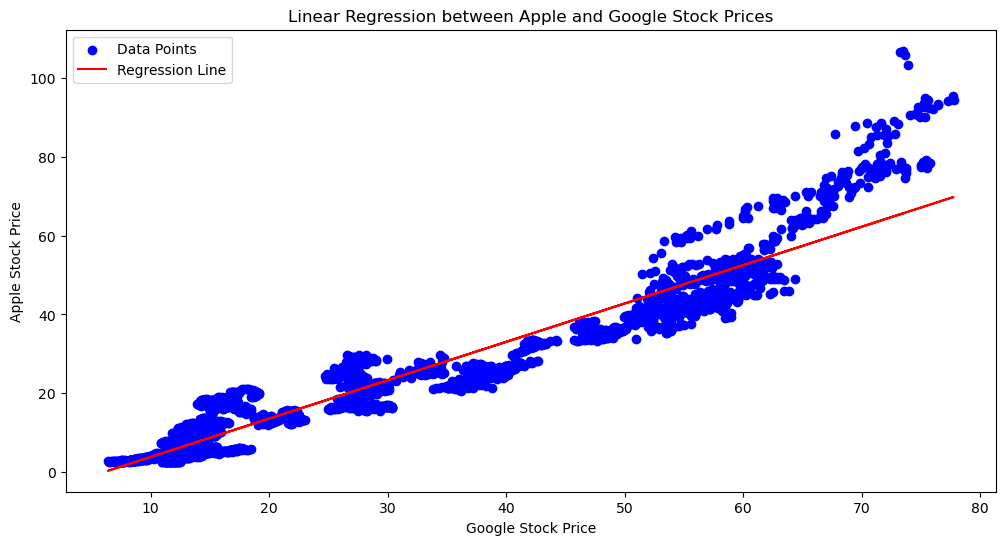

ADF Statistic: 1.1693
p-value: 0.9958
Critical Values: {'1%': -3.4322787515897653, '5%': -2.862392210828536, '10%': -2.5672236480639348}
The spread is not stationary (fail to reject null hypothesis).


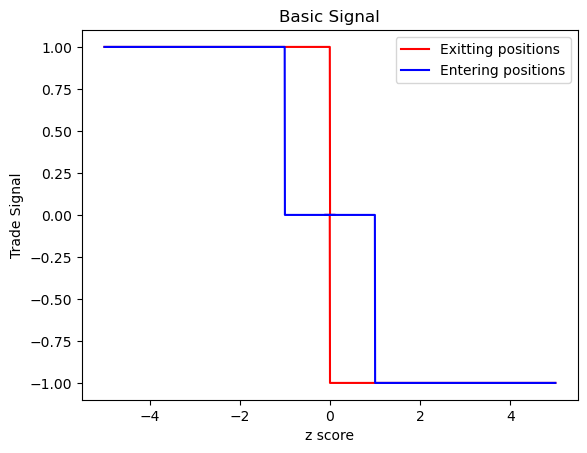

C:\Users\joabi\AppData\Local\Temp\ipykernel_41236\946675360.py:130: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  change_in_price_asset_1[0] = 0
C:\Users\joabi\AppData\Local\Temp\ipykernel_41236\946675360.py:132: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  change_in_price_asset_2[0] = 0


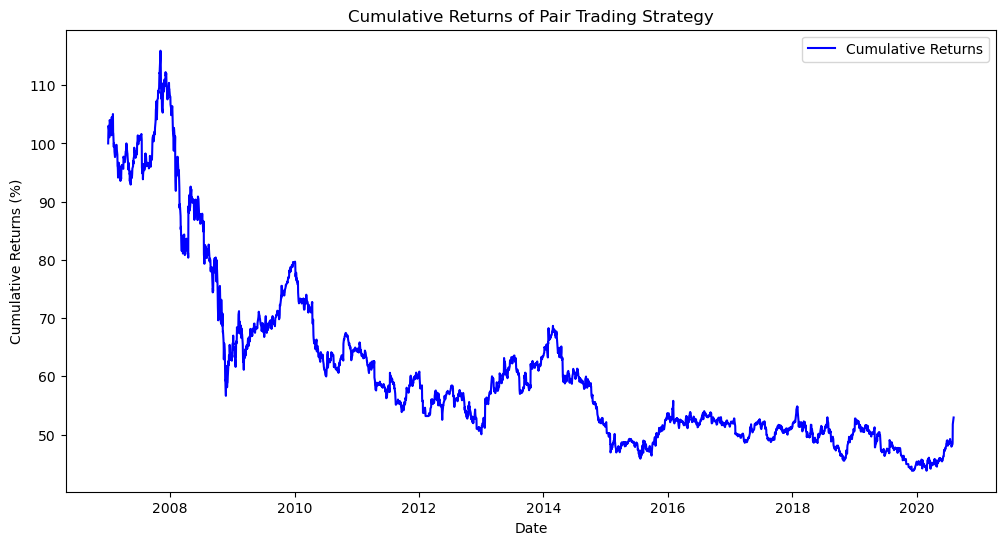

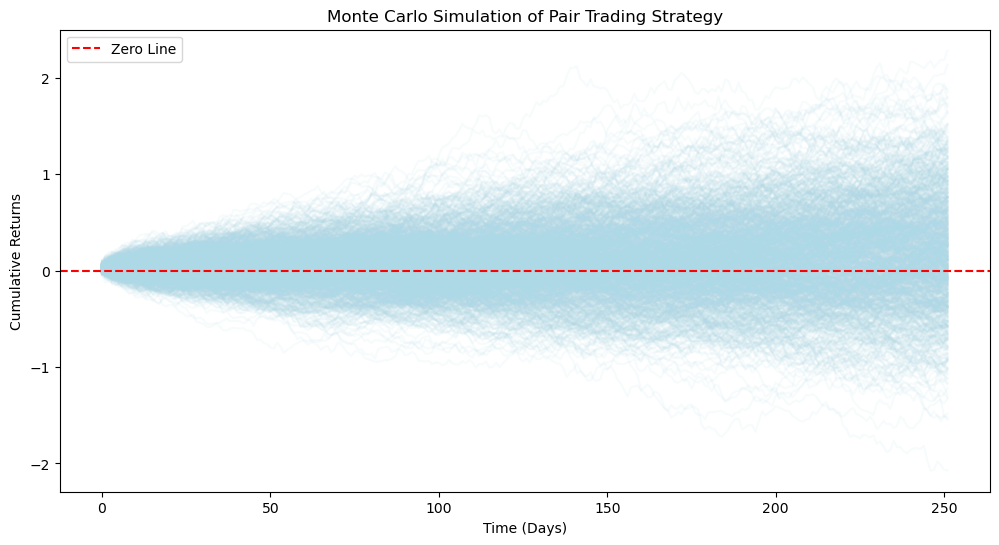

In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import copy
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn import model_selection as ms
from sklearn import linear_model as lm

#Importing stock data from Yahoo Finance Library for Apple and Google stock prices, from 2007 to 2024

asset_1 = 'AAPL' #Apple
asset_2 = 'GOOGL' #Google
tickers = [asset_1, asset_2]

start_date = datetime(2007, 1, 1)
end_date = datetime(2024, 1, 1)

data = yf.download(tickers, start=start_date, end=end_date)['Close'] #Closing prices uses instead of adjusted close prices, discussed above.
train, test = ms.train_test_split(data, shuffle = False, test_size = 0.2)
print(data.head())

#Data will now be used to plot the time series of the two assests and to visualize the correlation between them.
plt.figure(figsize=(12, 6))
plt.plot(train[asset_1], label=asset_1, color='blue')   
plt.plot(train[asset_2], label=asset_2, color='orange')
plt.title('Stock Prices of Apple and Google')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Plotting the correlation between the two assets
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Apple and Google Stock Prices')
plt.show()
#The correlation between the two assets is high, indicating that they move together, hence a Pair Trading strategy can be applied, the Pearson coefficient is 0.95, which is high.

#The code below is used to produce a linear regression model to calculate the hedge ratio, which is the slope of the regression line.
X = train[asset_2].values.reshape(-1, 1)  # Reshape for sklearn
y = train[asset_1].values.reshape(-1, 1)  # Reshape for sklearn
model = lm.LinearRegression()
model.fit(X, y)
hedge_ratio = model.coef_[0][0]  # Extract the slope (hedge ratio)
print(f"Hedge Ratio (Slope of Regression Line): {hedge_ratio:.4f}")


#Plotting the regression line
plt.figure(figsize=(12, 6))
plt.scatter(train[asset_2], train[asset_1], color='blue', label='Data Points')
plt.plot(train[asset_2], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression between Apple and Google Stock Prices')
plt.xlabel('Google Stock Price')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

#The code below will be used to perform the Augmented Dickey-Fuller test to check for stationarity of the spread between the two assets.
spread = train[asset_1] - hedge_ratio * train[asset_2]
result = adfuller(spread)
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print(f"Critical Values: {result[4]}")
if result[1] < 0.05:
    print("The spread is stationary (reject null hypothesis).")
else:
    print("The spread is not stationary (fail to reject null hypothesis).")
#The spread is stationary, indicating that the pair trading strategy can be applied.

x_scores_entering = np.linspace(.1, -5, 1000)
x_scores_entering_2 = np.linspace(-.1, 5, 1000)
x_scores_exitting = np.linspace(-5, .1, 1000)
x_scores_exitting_2 = np.linspace(5, -.1, 1000)


def basic_signal(z_score_array, z_score_trigger_in = 1, z_score_trigger_out = 0):
  signal = np.zeros(len(z_score_array))
  entered_long = False
  entered_short = False

  for i, element in enumerate(z_score_array):

    if not entered_long and not entered_short and element > z_score_trigger_in:
        signal[i] = -1
        entered_short = True

    elif not entered_long and not entered_short and element < -z_score_trigger_in:
      signal[i] = 1
      entered_long = True

    elif element > -z_score_trigger_out and entered_long:
      signal[i] = 0
      entered_long = False

    elif element < z_score_trigger_out and entered_short:
      signal[i] = 0
      entered_short = False

    else:
      if i == 0:
        signal[i] = 0
      else:
        signal[i] = signal[i-1]

  return signal

# plt.plot(x_scores, basic_signal(x_scores), label = "Entering positions")

plt.plot(x_scores_exitting, basic_signal(x_scores_exitting), label = "Exitting positions",c =  "r")
plt.plot(x_scores_exitting_2, basic_signal(x_scores_exitting_2), c = "r")
plt.plot(x_scores_entering, basic_signal(x_scores_entering), label = "Entering positions",c =  "b")
plt.plot(x_scores_entering_2, basic_signal(x_scores_entering_2), c = "b")
plt.xlabel("z score")
plt.ylabel("Trade Signal")
plt.legend()
plt.title("Basic Signal")
plt.show()

#The code above is used to create a basic signal function that generates trade signals based on z-scores. The function checks for conditions to enter long or short positions and to exit those positions based on specified z-score thresholds. The resulting signals are plotted to visualize when trades would be entered or exited.

#Now a backtest will be performed to evaluate the performance of the pair trading strategy using the generated signals.
def backtest(pair_time_series, unshifted_signal, cumulative_returns = True):
  asset_1 = pair_time_series.iloc[:,0]
  asset_2 = pair_time_series.iloc[:,1]

  change_in_price_asset_1 = asset_1.diff()
  change_in_price_asset_1[0] = 0
  change_in_price_asset_2 = asset_2.diff()
  change_in_price_asset_2[0] = 0

  signal_asset_1 = -unshifted_signal*hedge_ratio
  signal_asset_2 = unshifted_signal

  shifted_signal_asset_1 = np.roll(signal_asset_1,1)
  shifted_signal_asset_1[0] = 0


  shifted_signal_asset_2 = np.roll(signal_asset_2,1)
  shifted_signal_asset_2[0] = 0

  daily_returns_asset_1 = change_in_price_asset_1*shifted_signal_asset_1
  daily_returns_asset_2 = change_in_price_asset_2*shifted_signal_asset_2

  daily_returns = daily_returns_asset_1 + daily_returns_asset_2

  total_holdings = asset_1 + asset_2/hedge_ratio

  daily_percentage_returns = daily_returns/total_holdings

  if cumulative_returns:
    cumulative_pct_returns = 100*np.cumprod(1+daily_percentage_returns)
    return cumulative_pct_returns

  else:
    return daily_percentage_returns

#The code above defines a backtest function that evaluates the performance of a pair trading strategy. It calculates daily returns based on the signals generated, adjusts for the hedge ratio, and computes cumulative percentage returns. The function can return either cumulative returns or daily percentage returns based on the input parameter.
cumulative_returns = backtest(train, basic_signal(spread), cumulative_returns=True)
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns of Pair Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (%)')
plt.legend()
plt.show()

#Now the code below will be an attempt to implement Monte Carlo simulation to evaluate the performance of the pair trading strategy. The simulation will generate random paths for the spread and calculate the returns based on those paths.
def monte_carlo_simulation(pair_time_series, num_simulations=1000, time_horizon=252):
    asset_1 = pair_time_series.iloc[:, 0]
    asset_2 = pair_time_series.iloc[:, 1]

    # Calculate daily returns
    daily_returns_asset_1 = asset_1.pct_change().dropna()
    daily_returns_asset_2 = asset_2.pct_change().dropna()

    # Calculate the mean and standard deviation of returns
    mean_return_asset_1 = daily_returns_asset_1.mean()
    std_dev_asset_1 = daily_returns_asset_1.std()
    mean_return_asset_2 = daily_returns_asset_2.mean()
    std_dev_asset_2 = daily_returns_asset_2.std()

    # Initialize an array to hold the results of the simulations
    simulation_results = np.zeros((num_simulations, time_horizon))

    for i in range(num_simulations):
        # Generate random returns for each asset
        random_returns_asset_1 = np.random.normal(mean_return_asset_1, std_dev_asset_1, time_horizon)
        random_returns_asset_2 = np.random.normal(mean_return_asset_2, std_dev_asset_2, time_horizon)

        # Calculate cumulative returns
        cumulative_returns_asset_1 = np.cumprod(1 + random_returns_asset_1)
        cumulative_returns_asset_2 = np.cumprod(1 + random_returns_asset_2)

        # Store the results
        simulation_results[i] = cumulative_returns_asset_1 - hedge_ratio * cumulative_returns_asset_2

    return simulation_results
# Run the Monte Carlo simulation
num_simulations = 1000
simulation_results = monte_carlo_simulation(train, num_simulations=num_simulations)
# Plot the results of the Monte Carlo simulation
plt.figure(figsize=(12, 6))
plt.plot(simulation_results.T, color='lightblue', alpha=0.1)
plt.title('Monte Carlo Simulation of Pair Trading Strategy')
plt.xlabel('Time (Days)')
plt.ylabel('Cumulative Returns')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.legend()
plt.show()
